In [1]:
import tensorflow as tf
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = tf.keras.layers.Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

2024-04-16 14:05:39.750978: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 14:05:39.782511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 14:05:40.303516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

def convolutional_block(X, f, filters, stage, block, s = 2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = tf.keras.layers.Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(F2, (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X_shortcut = tf.keras.layers.Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [3]:
def ResNet50(input_shape = (64, 64, 3), classes = 6):

    X_input = tf.keras.layers.Input(input_shape)

    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)

    X = tf.keras.layers.Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f = 3, filters = [16, 16, 64], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [16,16,64], stage=2, block='b')
    X = identity_block(X, 3, [16,16,64], stage=2, block='c')

    X = convolutional_block(X, f = 3, filters = [32, 32, 128], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [32,32,128], stage=3, block='b')
    X = identity_block(X, 3, [32, 32,128], stage=3, block='c')
    X = identity_block(X, 3, [32, 32,128], stage=3, block='d')

    X = convolutional_block(X, f = 3, filters = [64, 64,256], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [64,64,256], stage=4, block='b')
    X = identity_block(X, 3, [64,64,256], stage=4, block='c')
    X = identity_block(X, 3, [64,64,256], stage=4, block='d')
    X = identity_block(X, 3, [64,64,256], stage=4, block='e')
    X = identity_block(X, 3, [64,64,256], stage=4, block='f')

    X = convolutional_block(X, f = 3, filters = [128, 128,512], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=5, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=5, block='c')

    X = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)


validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/home/developer/Desktop/brain tumor(3)/train',
    target_size=(299,299),
    batch_size=128,
    class_mode='sparse'
)

validation_generator=validation_datagen.flow_from_directory(
    '/home/developer/Desktop/brain tumor(3)/val',
    target_size=(299,299),
    batch_size=32,
    class_mode='sparse'
)
test_generator=test_datagen.flow_from_directory(
    '/home/developer/Desktop/brain tumor(3)/test',
    target_size=(299,299),
    batch_size=32,
    class_mode='sparse'
)

Found 21434 images belonging to 4 classes.
Found 1233 images belonging to 4 classes.
Found 3050 images belonging to 4 classes.


In [5]:


import matplotlib.pyplot as plt

def visualize_generator(generator, num_images=10):

    class_labels = list(generator.class_indices.keys())
    
    images, labels = next(generator)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[int(labels[i])])
        plt.axis('off')
    plt.show()

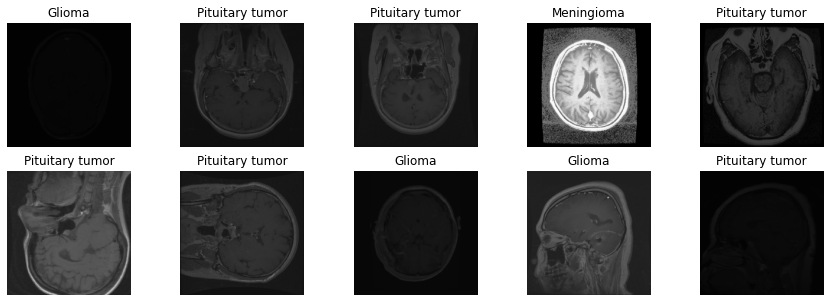

In [6]:
visualize_generator(train_generator,10)

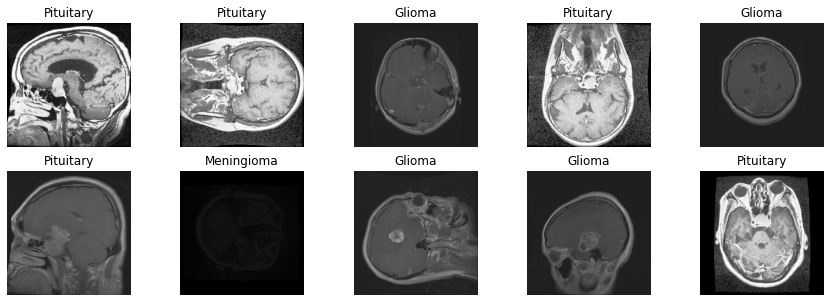

In [26]:
visualize_generator(test_generator,10)

In [4]:
model=ResNet50(input_shape=(299,299,3),classes=4)

2024-04-16 14:05:49.746597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 14:05:49.751592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 14:05:49.752081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])


In [21]:

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5", monitor="val_accuracy", save_best_only=True)
csvlogger_callback=tf.keras.callbacks.CSVLogger('model_Resnet50.csv', separator=",", append=True)
early_callback=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)

In [22]:
history=model.fit(train_generator,epochs=30,validation_data=test_generator,callbacks=[model_checkpoint_callback,csvlogger_callback])


Epoch 1/30


2024-04-10 14:04:53.868817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


168/168 [==============================] - ETA: 0s - loss: 1.6747 - accuracy: 0.5728

2024-04-10 14:06:10.252954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


168/168 [==============================] - 85s 397ms/step - loss: 1.6747 - accuracy: 0.5728 - val_loss: 3.5807 - val_accuracy: 0.4289
Epoch 2/30
168/168 [==============================] - 66s 392ms/step - loss: 0.6123 - accuracy: 0.7210 - val_loss: 0.7069 - val_accuracy: 0.6577
Epoch 3/30
168/168 [==============================] - 66s 393ms/step - loss: 0.5189 - accuracy: 0.7678 - val_loss: 0.4949 - val_accuracy: 0.7744
Epoch 4/30
168/168 [==============================] - 66s 392ms/step - loss: 0.4902 - accuracy: 0.7825 - val_loss: 0.4678 - val_accuracy: 0.7902
Epoch 5/30
168/168 [==============================] - 66s 392ms/step - loss: 0.4524 - accuracy: 0.8007 - val_loss: 3.3667 - val_accuracy: 0.3866
Epoch 6/30
168/168 [==============================] - 66s 392ms/step - loss: 0.4320 - accuracy: 0.8070 - val_loss: 0.8861 - val_accuracy: 0.6902
Epoch 7/30
168/168 [==============================] - 66s 391ms/step - loss: 0.3976 - accuracy: 0.8259 - val_loss: 1.7981 - val_accuracy: 0.6

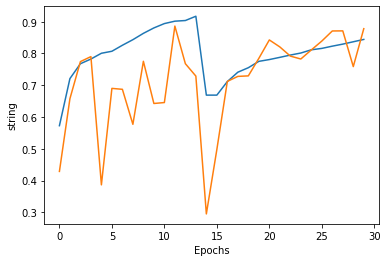

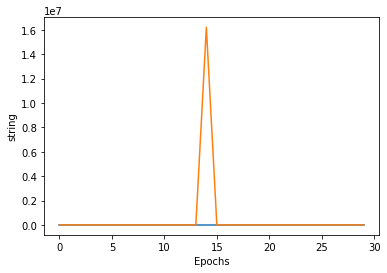

In [23]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel("string")
    plt.show()
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

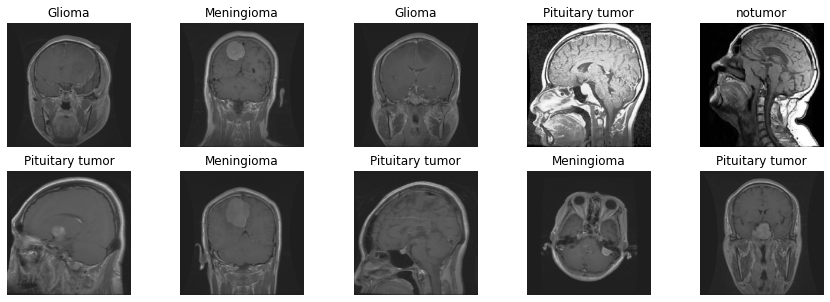

In [27]:
visualize_generator(validation_generator,10)

In [28]:
model.evaluate(validation_generator)

 2/39 [>.............................] - ETA: 2s - loss: 0.2100 - accuracy: 0.9219

2024-04-10 14:47:15.432725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/39 [==============================] - 3s 86ms/step - loss: 0.2327 - accuracy: 0.9148


[0.23267249763011932, 0.9148418307304382]

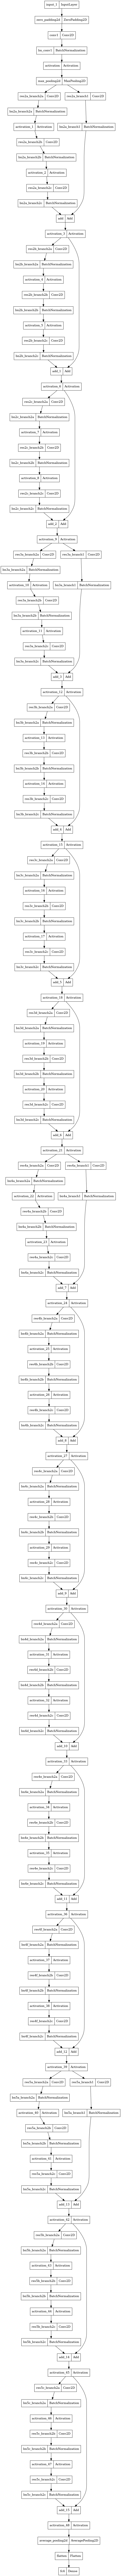

In [7]:
tf.keras.utils.plot_model(model,to_file='Resnet50.png')